<a href="https://colab.research.google.com/github/JITHIN-ANTONY-JOSEPH/Black-Friday-Sales/blob/main/Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Black Friday Dataset EDA and Feature Engineering

Clean data and get it ready for model training

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
#importing the dataset
df_train=pd.read_csv('train.csv')   

In [74]:
df_train.shape

(550068, 12)

In [75]:
df_train.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [76]:
# Import the test data
df_test=pd.read_csv('test.csv')
df_test.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN


In [77]:
## Append test data to train data
df=df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [79]:
df.drop('User_ID',axis=1,inplace=True)

In [80]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [81]:
#Since gender is a categorical variable lets encode it by providing a number to this category
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [82]:
##Since age is a range lets encode this as well
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [83]:
df.groupby(['Age']).size()

Age
0-17      21334
18-25    141953
26-35    313015
36-45    156724
46-50     65278
51-55     54784
55+       30579
dtype: int64

In [84]:
pd.get_dummies(df['Age'], drop_first=True)

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
233594,0,1,0,0,0,0
233595,0,1,0,0,0,0
233596,0,1,0,0,0,0
233597,0,0,0,1,0,0


In [85]:
# On top of this we will perform ordinal encoding as we can rank them in the order of the age range
df['Age']= df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [86]:
# Second techniqeue
""" this is using sklearn preprocessing
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Age']=label_encoder.fit_transform(df['Age'])
df['Age'].unique()"""

" this is using sklearn preprocessing\nfrom sklearn import preprocessing\nlabel_encoder=preprocessing.LabelEncoder()\ndf['Age']=label_encoder.fit_transform(df['Age'])\ndf['Age'].unique()"

In [87]:
df['Age'].sort_values().unique()

array([1, 2, 3, 4, 5, 6, 7])

In [88]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [89]:
#City is a catgorical variable as well and hence we can encode them as well
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [90]:
df_city=pd.get_dummies(df['City_Category'])

In [91]:
df=pd.concat([df,df_city],axis=1)

In [92]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,1,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,1,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,1,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,0,1


In [93]:
#Dropiing city_category as we have separated the column into multiple boolean columns
df.drop('City_Category',axis=1,inplace=True)

In [94]:
df.head(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,1,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,1,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,0,1


In [95]:
##Checking for missing values
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

In [96]:
## Replacing missing values in Product Category
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [97]:
df['Product_Category_2'].value_counts().sort_values()

7.0       854
18.0     4027
3.0      4123
10.0     4420
12.0     7801
9.0      8177
13.0    15054
17.0    19104
11.0    20230
6.0     23575
4.0     36705
5.0     37165
15.0    54114
16.0    61687
2.0     70498
14.0    78834
8.0     91317
Name: Product_Category_2, dtype: int64

In [98]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [99]:
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

In [100]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [101]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [102]:
df.shape

(783667, 13)

In [103]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [104]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [105]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  uint8  
 11  B                           783667 non-null  uint8  
 12  C                           783667 non-null  uint8  
dtypes: float64(3),

In [107]:
# Stay_in_Current_city_years hold data only integer data but hold object datatype and hence good to convert the dadatype to integer
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [108]:
df['A']=df['A'].astype(int)

In [109]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  int64  
 11  B                           783667 non-null  int64  
 12  C                           783667 non-null  int64  
dtypes: float64(3),

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


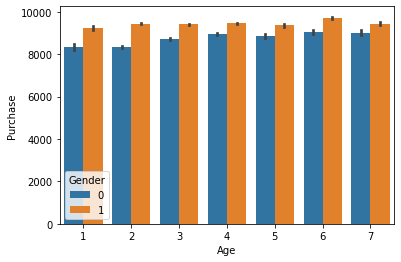

In [111]:
##Data Visualisation
sns.barplot('Age','Purchase',data=df,hue='Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


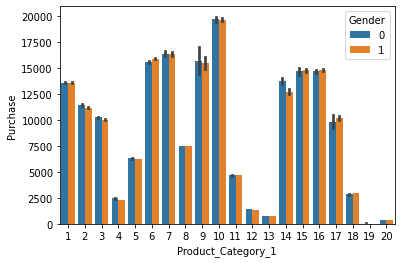

In [112]:
##Checking sales of Catgegory 1 
sns.barplot('Product_Category_1','Purchase',data=df,hue='Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


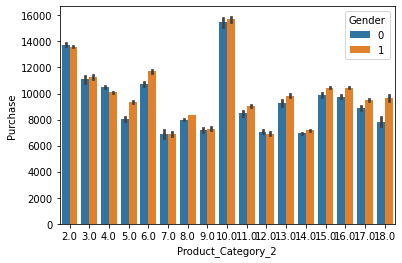

In [113]:
##Checking sales of Catgegory 2 
sns.barplot('Product_Category_2','Purchase',data=df,hue='Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


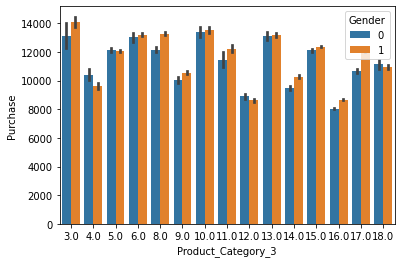

In [114]:
##Checking sales of Catgegory 3 
sns.barplot('Product_Category_3','Purchase',data=df,hue='Gender')

## Feature Scaling

In [153]:
df=df.drop('Product_ID',axis=1)

In [166]:
## Removing the test data from the Data Farem thats cleaned
df_test=df[df['Purchase'].isnull()]

In [167]:
df_train=df[df['Purchase'].notnull()]

In [168]:
df_test.shape

(233599, 12)

In [169]:
df_train.shape

(550068, 12)

In [170]:
df.shape

(783667, 12)

In [171]:
Y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [172]:
##Splitting the training data into test and train

Y=df_train['Purchase']
X=df_train.drop(columns='Purchase',axis=1)

In [173]:
X.shape

(550068, 11)

In [174]:
Y.shape

(550068,)

In [175]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [176]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

In [179]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [180]:
model.fit(X_train,Y_train)

LinearRegression()

In [181]:
print(model.coef_)

[  219.40340889   161.48399281    40.75197867    13.00328258
   -29.40171369 -1595.03999038    -6.24829968  -421.6489872
  -123.32450139   -60.94447964   182.96008654]


In [182]:
print(model.intercept_)

9260.52247622407


In [184]:
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

,Coeff
Gender,219.403409
Age,161.483993
Occupation,40.751979
Stay_In_Current_City_Years,13.003283
Marital_Status,-29.401714
Product_Category_1,-1595.039990
Product_Category_2,-6.248300
Product_Category_3,-421.648987
A,-123.324501
B,-60.944480


In [186]:
predictions = model.predict(X_test)

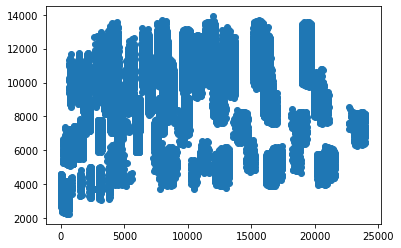

In [187]:
plt.scatter(Y_test, predictions)

(array([ 2005., 16808., 38687., 57310., 27996., 17443., 13554.,  4090.,
         1690.,  1940.]),
 array([-10901.09363831,  -8061.16897794,  -5221.24431757,  -2381.31965719,
           458.60500318,   3298.52966355,   6138.45432393,   8978.3789843 ,
         11818.30364467,  14658.22830504,  17498.15296542]),
 <a list of 10 Patch objects>)

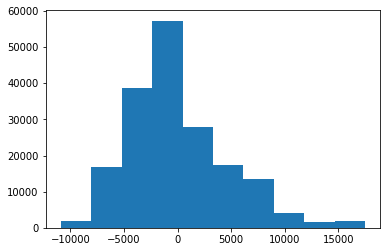

In [188]:
plt.hist(Y_test - predictions)